In [6]:
import pandas as pd

file_path = "new_retail_data.csv"  # Correct file name
new_retail_data = pd.read_csv(file_path)

print(new_retail_data.head())  # Show first 5 rows
print(new_retail_data.shape)  # Display shape

   Transaction_ID  Customer_ID                 Name                Email  \
0       8691788.0      37249.0  Michelle Harrington    Ebony39@gmail.com   
1       2174773.0      69749.0          Kelsey Hill     Mark36@gmail.com   
2       6679610.0      30192.0         Scott Jensen    Shane85@gmail.com   
3       7232460.0      62101.0        Joseph Miller     Mary34@gmail.com   
4       4983775.0      27901.0        Debra Coleman  Charles30@gmail.com   

          Phone                      Address        City            State  \
0  1.414787e+09            3959 Amanda Burgs    Dortmund           Berlin   
1  6.852900e+09           82072 Dawn Centers  Nottingham          England   
2  8.362160e+09            4133 Young Canyon     Geelong  New South Wales   
3  2.776752e+09  8148 Thomas Creek Suite 100    Edmonton          Ontario   
4  9.098268e+09    5813 Lori Ports Suite 269     Bristol          England   

   Zipcode    Country  ...  Total_Amount Product_Category  Product_Brand  \
0  7

In [1]:
import os

print("Current Working Directory:", os.getcwd())

Current Working Directory: /Users/khanzakirul/Documents/EAS 503/VS CODE


In [7]:
print(new_retail_data.head(10))  # Show first 10 rows
print(new_retail_data.tail(10))  # Show last 10 rows

   Transaction_ID  Customer_ID                 Name                Email  \
0       8691788.0      37249.0  Michelle Harrington    Ebony39@gmail.com   
1       2174773.0      69749.0          Kelsey Hill     Mark36@gmail.com   
2       6679610.0      30192.0         Scott Jensen    Shane85@gmail.com   
3       7232460.0      62101.0        Joseph Miller     Mary34@gmail.com   
4       4983775.0      27901.0        Debra Coleman  Charles30@gmail.com   
5       6095326.0      41289.0         Ryan Johnson    Haley12@gmail.com   
6       5434096.0      97285.0           Erin Lewis   Arthur76@gmail.com   
7       2344675.0      26603.0        Angela Fields    Tanya94@gmail.com   
8       4155845.0      80175.0          Diane Clark   Martin39@gmail.com   
9       4926148.0      31878.0            Lori Bell  Jessica33@gmail.com   

          Phone                       Address        City            State  \
0  1.414787e+09             3959 Amanda Burgs    Dortmund           Berlin   
1  6.85

In [9]:
print(f"Total Rows: {new_retail_data.shape[0]}")
print(f"Total Columns: {new_retail_data.shape[1]}")

Total Rows: 302010
Total Columns: 30


In [10]:
# Checking for missing values in the dataset
missing_values = new_retail_data.isnull().sum()
print(missing_values)

Transaction_ID      333
Customer_ID         308
Name                382
Email               347
Phone               362
Address             315
City                248
State               281
Zipcode             340
Country             271
Age                 173
Gender              317
Income              290
Customer_Segment    215
Date                359
Year                350
Month               273
Time                350
Total_Purchases     361
Amount              357
Total_Amount        350
Product_Category    283
Product_Brand       281
Product_Type          0
Feedback            184
Shipping_Method     337
Payment_Method      297
Order_Status        235
Ratings             184
products              0
dtype: int64


In [11]:
duplicate_count = new_retail_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 4


In [12]:
missing_values, duplicate_count

(Transaction_ID      333
 Customer_ID         308
 Name                382
 Email               347
 Phone               362
 Address             315
 City                248
 State               281
 Zipcode             340
 Country             271
 Age                 173
 Gender              317
 Income              290
 Customer_Segment    215
 Date                359
 Year                350
 Month               273
 Time                350
 Total_Purchases     361
 Amount              357
 Total_Amount        350
 Product_Category    283
 Product_Brand       281
 Product_Type          0
 Feedback            184
 Shipping_Method     337
 Payment_Method      297
 Order_Status        235
 Ratings             184
 products              0
 dtype: int64,
 4)

In [14]:
retail_data = new_retail_data.drop_duplicates() # dropping duplicate rows

In [15]:
retail_data = retail_data.dropna(subset=['Transaction_ID', 'Customer_ID']) #dropping na values for the columns

In [16]:
retail_data[['City', 'State', 'Country', 'Zipcode']] = retail_data[['City', 'State', 'Country', 'Zipcode']].fillna("Unknown") # filling na values with Unknown


In [17]:
retail_data['Gender'] = retail_data['Gender'].fillna("Not Specified")

In [18]:
retail_data[['Customer_Segment', 'Payment_Method', 'Shipping_Method', 'Order_Status']] = retail_data[['Customer_Segment', 'Payment_Method', 'Shipping_Method', 'Order_Status']].fillna("Unknown")

In [19]:
income_mapping = {"Low": 1, "Medium": 2, "High": 3}
retail_data['Income'] = retail_data['Income'].replace(income_mapping)
retail_data['Income'] = pd.to_numeric(retail_data['Income'], errors='coerce')
feedback_mapping = {"Excellent": 5, "Good": 4, "Average": 3, "Poor": 2, "Terrible": 1}  
retail_data['Feedback'] = retail_data['Feedback'].replace(feedback_mapping)

retail_data['Feedback'] = pd.to_numeric(retail_data['Feedback'], errors='coerce')


retail_data['Age'] = retail_data['Age'].fillna(retail_data['Age'].median())
retail_data['Income'] = retail_data['Income'].fillna(retail_data['Income'].median())
retail_data['Ratings'] = retail_data['Ratings'].fillna(retail_data['Ratings'].median())
retail_data['Feedback'] = retail_data['Feedback'].fillna(retail_data['Feedback'].median())  # Now Feedback is numeric

print("Missing values handled successfully!")
# In this chunk, categorical values for Income and Feedback are being mapped to numerical values to facilitate analysis.
# Missing values in Age, Income, Ratings, and Feedback are filled using the median, ensuring that gaps in the dataset do not distort insights.

Missing values handled successfully!


In [20]:
print(retail_data.isnull().sum())

Transaction_ID        0
Customer_ID           0
Name                380
Email               346
Phone               361
Address             313
City                  0
State                 0
Zipcode               0
Country               0
Age                   0
Gender                0
Income                0
Customer_Segment      0
Date                359
Year                348
Month               272
Time                350
Total_Purchases     361
Amount              356
Total_Amount        348
Product_Category    282
Product_Brand       278
Product_Type          0
Feedback              0
Shipping_Method       0
Payment_Method        0
Order_Status          0
Ratings               0
products              0
dtype: int64


In [21]:
print(f"Number of duplicate rows: {retail_data.duplicated().sum()}") #checking

Number of duplicate rows: 0


In [22]:
print(retail_data.dtypes[['Income', 'Feedback', 'Age', 'Ratings']]) #checking dta types

Income      float64
Feedback    float64
Age         float64
Ratings     float64
dtype: object


In [23]:
# Years, Month - most frequent value(mode), Date and Time "Unknown"
retail_data['Year'] = retail_data['Year'].fillna(retail_data['Year'].mode()[0])
retail_data['Month'] = retail_data['Month'].fillna(retail_data['Month'].mode()[0])
retail_data['Date'] = retail_data['Date'].fillna("Unknown")
retail_data['Time'] = retail_data['Time'].fillna("Unknown")

In [24]:
# filling missing values of Total_Purchase, Amount, Total_amount with 0, assuming no purchase was made

retail_data[['Total_Purchases', 'Amount', 'Total_Amount']] = retail_data[['Total_Purchases', 'Amount', 'Total_Amount']].fillna(0)

In [25]:
# product Category and Product Brand missing values with "Unknown"

retail_data[['Product_Category', 'Product_Brand']] = retail_data[['Product_Category', 'Product_Brand']].fillna("Unknown")

In [26]:
print(retail_data.isnull().sum())

Transaction_ID        0
Customer_ID           0
Name                380
Email               346
Phone               361
Address             313
City                  0
State                 0
Zipcode               0
Country               0
Age                   0
Gender                0
Income                0
Customer_Segment      0
Date                  0
Year                  0
Month                 0
Time                  0
Total_Purchases       0
Amount                0
Total_Amount          0
Product_Category      0
Product_Brand         0
Product_Type          0
Feedback              0
Shipping_Method       0
Payment_Method        0
Order_Status          0
Ratings               0
products              0
dtype: int64


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Checking the number of unique product categories
unique_categories = retail_data["Product_Category"].nunique()


unique_category_list = retail_data["Product_Category"].unique()

# Output the number of unique categories and their names
unique_categories, unique_category_list

(6,
 array(['Clothing', 'Electronics', 'Books', 'Home Decor', 'Grocery',
        'Unknown'], dtype=object))

/var/folders/ph/rp_k0z0x7rzbmjtd7j2pdjjc0000gn/T/ipykernel_50740/869970287.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette="viridis")


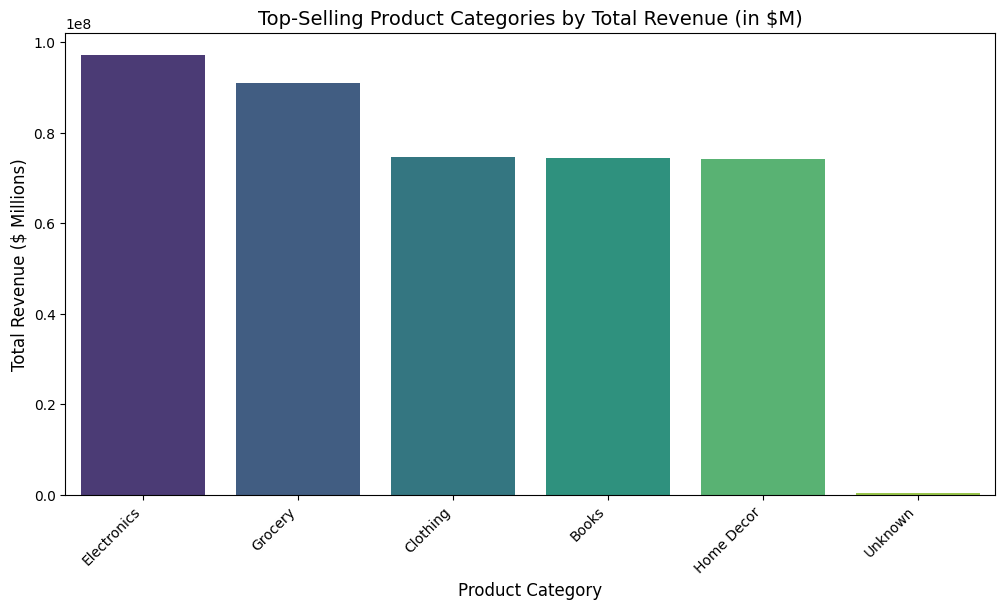

In [29]:
# Aggregating total revenue by product category
top_categories = retail_data.groupby("Product_Category")["Total_Amount"].sum().sort_values(ascending=False)

# Plotting the top-selling product categories
plt.figure(figsize=(12, 6))
sns.barplot(x=top_categories.index, y=top_categories.values, palette="viridis")

# Adding labels and title
plt.xticks(rotation=45, ha="right")
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Total Revenue ($ Millions)", fontsize=12) 
plt.title("Top-Selling Product Categories by Total Revenue (in $M)", fontsize=14)



plt.show()

In [54]:
# Extracting numeric values for top-selling product categories
top_categories_values = retail_data.groupby("Product_Category")["Total_Amount"].sum().sort_values(ascending=False).reset_index()


top_categories_values

,Product_Category,Total_Amount
0,Electronics,9.719201e+07
1,Grocery,9.087698e+07
2,Clothing,7.468825e+07
3,Books,7.445681e+07
4,Home Decor,7.410459e+07
5,Unknown,3.804450e+05


In [30]:
#Calculates total revenue, max transaction revenue, and min transaction revenue to summarize overall sales performance.
total_revenue_sum = retail_data["Total_Amount"].sum()
max_revenue = retail_data["Total_Amount"].max()
min_revenue = retail_data["Total_Amount"].min()


print(f"Total Revenue (Sum): {total_revenue_sum}")
print(f"Max Revenue (Single Transaction): {max_revenue}")
print(f"Min Revenue (Single Transaction): {min_revenue}")

Total Revenue (Sum): 411699079.89262915
Max Revenue (Single Transaction): 4999.625796
Min Revenue (Single Transaction): 0.0


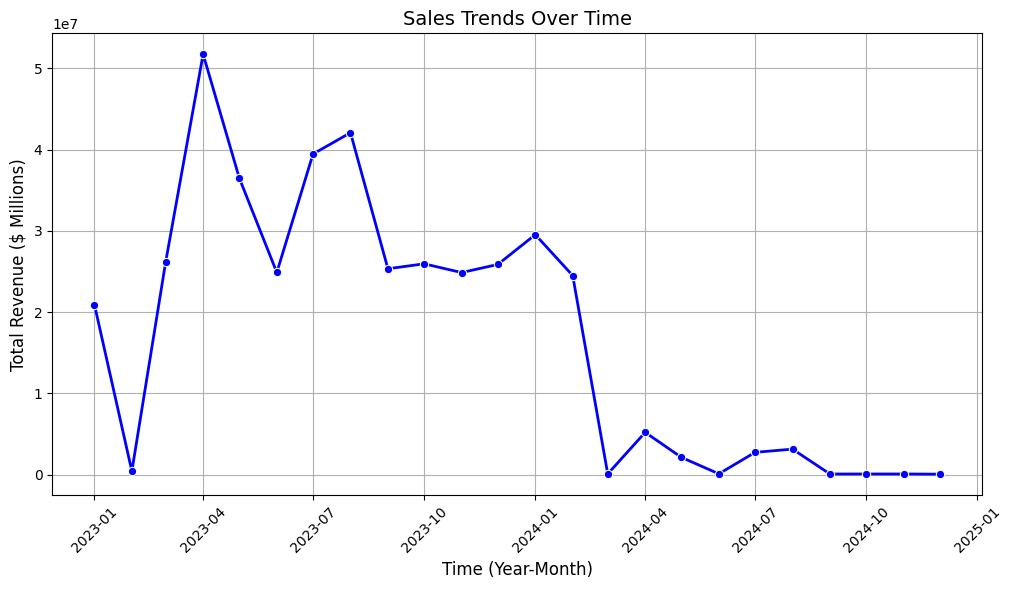

In [31]:
import calendar

# Convert Month names to numbers
if retail_data["Month"].dtype == "object":
    retail_data["Month"] = retail_data["Month"].apply(lambda x: list(calendar.month_name).index(x) if x in calendar.month_name else x)

# Aggregating total sales over time (monthly)
sales_trend = retail_data.groupby(["Year", "Month"])["Total_Amount"].sum().reset_index()

# Convert Year & Month into a proper time format
sales_trend["Date"] = pd.to_datetime(sales_trend["Year"].astype(int).astype(str) + "-" + sales_trend["Month"].astype(int).astype(str), format="%Y-%m")


sales_trend = sales_trend.sort_values("Date")


plt.figure(figsize=(12, 6))
sns.lineplot(x=sales_trend["Date"], y=sales_trend["Total_Amount"], marker="o", linewidth=2, color="blue")


plt.xlabel("Time (Year-Month)", fontsize=12)
plt.ylabel("Total Revenue ($ Millions)", fontsize=12)
plt.title("Sales Trends Over Time", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)


plt.show()

In [33]:
print(sales_trend.head(20))  # Display first 20 rows to check the trend

# Find the month with the highest & lowest revenue
max_sales_month = sales_trend.loc[sales_trend["Total_Amount"].idxmax()]
min_sales_month = sales_trend.loc[sales_trend["Total_Amount"].idxmin()]

pd.set_option('display.max_colwidth', None)  # Show full column width
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.expand_frame_repr', False) 
print("\n📈 Month with Highest Sales:")
print(max_sales_month)

print("\n📉 Month with Lowest Sales:")
print(min_sales_month)

      Year  Month  Total_Amount       Date
0   2023.0      1  2.091688e+07 2023-01-01
1   2023.0      2  4.142870e+05 2023-02-01
2   2023.0      3  2.617349e+07 2023-03-01
3   2023.0      4  5.173511e+07 2023-04-01
4   2023.0      5  3.646547e+07 2023-05-01
5   2023.0      6  2.487186e+07 2023-06-01
6   2023.0      7  3.944825e+07 2023-07-01
7   2023.0      8  4.207335e+07 2023-08-01
8   2023.0      9  2.532858e+07 2023-09-01
9   2023.0     10  2.593352e+07 2023-10-01
10  2023.0     11  2.486045e+07 2023-11-01
11  2023.0     12  2.585652e+07 2023-12-01
12  2024.0      1  2.952292e+07 2024-01-01
13  2024.0      2  2.449294e+07 2024-02-01
14  2024.0      3  7.816376e+04 2024-03-01
15  2024.0      4  5.196355e+06 2024-04-01
16  2024.0      5  2.116186e+06 2024-05-01
17  2024.0      6  8.927253e+04 2024-06-01
18  2024.0      7  2.734851e+06 2024-07-01
19  2024.0      8  3.130202e+06 2024-08-01

📈 Month with Highest Sales:
Year                         2023.0
Month                           

In [34]:
print("\n📈 Month with Highest Sales:")
print(max_sales_month.to_string()) 

print("\n📉 Month with Lowest Sales:")
print(min_sales_month.to_string())  



📈 Month with Highest Sales:
Year                         2023.0
Month                             4
Total_Amount        51735112.867201
Date            2023-04-01 00:00:00

📉 Month with Lowest Sales:
Year                         2024.0
Month                            12
Total_Amount           49519.561447
Date            2024-12-01 00:00:00


In [35]:
#Extracts and compares April and December sales trends across years to analyze seasonal spending patterns and identify shifts in consumer behavior

april_sales = retail_data[retail_data["Month"] == 4].groupby("Year")["Total_Amount"].sum().reset_index()

december_sales = retail_data[(retail_data["Month"] == 12) & (retail_data["Year"].isin([2023, 2024]))].groupby("Year")["Total_Amount"].sum().reset_index()


print("April Sales Performance Over the Years:\n", april_sales)
print("\n December 2023 vs. December 2024 Sales Comparison:\n", december_sales)

April Sales Performance Over the Years:
      Year  Total_Amount
0  2023.0  5.173511e+07
1  2024.0  5.196355e+06

 December 2023 vs. December 2024 Sales Comparison:
      Year  Total_Amount
0  2023.0  2.585652e+07
1  2024.0  4.951956e+04


/var/folders/ph/rp_k0z0x7rzbmjtd7j2pdjjc0000gn/T/ipykernel_50740/2031425919.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=retail_data["Income"], y=retail_data["Total_Amount"], palette="coolwarm")


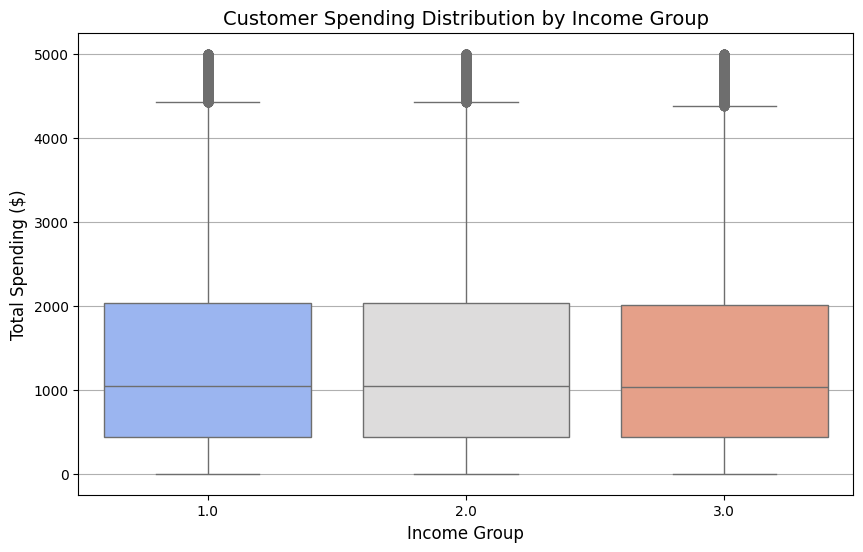

In [55]:
# Boxplot on income groups

plt.figure(figsize=(10, 6))
sns.boxplot(x=retail_data["Income"], y=retail_data["Total_Amount"], palette="coolwarm")

# Adding labels and title
plt.xlabel("Income Group", fontsize=12)
plt.ylabel("Total Spending ($)", fontsize=12)
plt.title("Customer Spending Distribution by Income Group", fontsize=14)
plt.grid(axis="y")

plt.show()

In [37]:
# Getting summary statistics of Total Spending (Total_Amount) grouped by Income Group
income_spending_stats = retail_data.groupby("Income")["Total_Amount"].describe()


print(income_spending_stats)

           count         mean          std  min         25%          50%          75%          max
Income                                                                                            
1.0      96050.0  1369.471764  1127.648199  0.0  442.645777  1046.156788  2034.579941  4999.171428
2.0     130259.0  1367.540398  1133.782952  0.0  434.620966  1038.343603  2031.878061  4999.625796
3.0      75056.0  1359.343321  1123.489541  0.0  435.740481  1033.355015  2014.139483  4998.723479


In [38]:
age_bins = [18, 25, 35, 45, 55, 65, 75, 100]  # Age groups
age_labels = ["18-24", "25-34", "35-44", "45-54", "55-64", "65-74", "75+"]

# Categorizing customers into age groups
retail_data["Age_Group"] = pd.cut(retail_data["Age"], bins=age_bins, labels=age_labels)

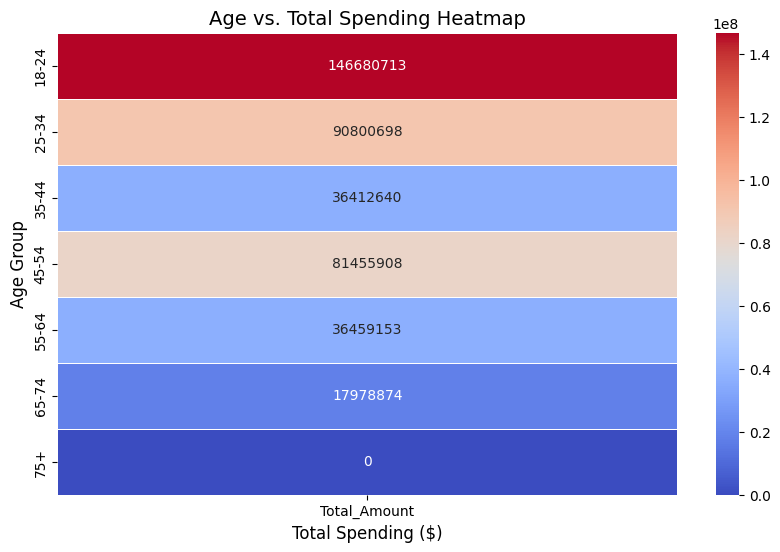

In [39]:
# Creating an Age vs. Spending Heatmap
plt.figure(figsize=(10, 6))

# Creating a pivot table for total spending by age group
age_spending_pivot = retail_data.pivot_table(index="Age_Group", values="Total_Amount", aggfunc="sum")


sns.heatmap(age_spending_pivot, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5)


plt.ylabel("Age Group", fontsize=12)
plt.xlabel("Total Spending ($)", fontsize=12)
plt.title("Age vs. Total Spending Heatmap", fontsize=14)


plt.show()

In [40]:
#Aggregates total spending by age group to identify which age demographic contributes the most to retail revenue
age_spending_values = retail_data.groupby("Age_Group")["Total_Amount"].sum().reset_index()

age_spending_values

/var/folders/ph/rp_k0z0x7rzbmjtd7j2pdjjc0000gn/T/ipykernel_50740/3104588491.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_spending_values = retail_data.groupby("Age_Group")["Total_Amount"].sum().reset_index()


,Age_Group,Total_Amount
0,18-24,1.466807e+08
1,25-34,9.080070e+07
2,35-44,3.641264e+07
3,45-54,8.145591e+07
4,55-64,3.645915e+07
5,65-74,1.797887e+07
6,75+,0.000000e+00


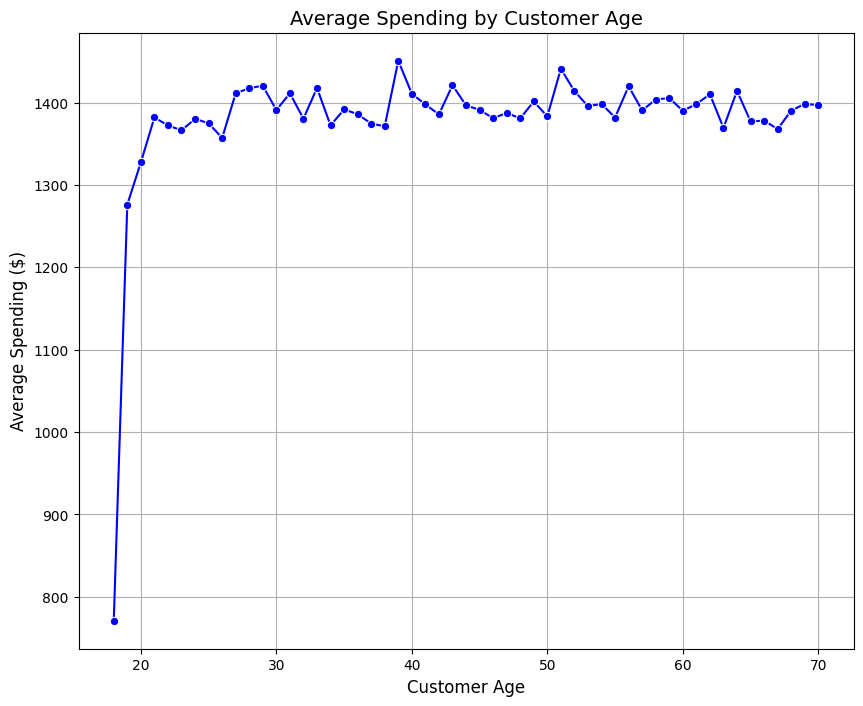

In [41]:
age_spending_trend = retail_data.groupby("Age")["Total_Amount"].mean().reset_index()

# Creating a line plot
plt.figure(figsize=(10, 8))
sns.lineplot(x=age_spending_trend["Age"], y=age_spending_trend["Total_Amount"], color="blue", marker="o")

# Adding labels and title
plt.xlabel("Customer Age", fontsize=12)
plt.ylabel("Average Spending ($)", fontsize=12)
plt.title("Average Spending by Customer Age", fontsize=14)
plt.grid(True)

plt.show()

In [42]:
age_spending_trend_values = retail_data.groupby("Age")["Total_Amount"].mean().reset_index()

print(age_spending_trend_values)

     Age  Total_Amount
0   18.0    770.912923
1   19.0   1276.309331
2   20.0   1327.429682
3   21.0   1381.979676
4   22.0   1372.345089
5   23.0   1366.396421
6   24.0   1380.289581
7   25.0   1374.993150
8   26.0   1357.160857
9   27.0   1411.343295
10  28.0   1417.560228
11  29.0   1420.572133
12  30.0   1390.977034
13  31.0   1411.414147
14  32.0   1380.474665
15  33.0   1417.846903
16  34.0   1372.384264
17  35.0   1391.691399
18  36.0   1386.034675
19  37.0   1374.556197
20  38.0   1371.277111
21  39.0   1450.907922
22  40.0   1410.830300
23  41.0   1397.817118
24  42.0   1385.734857
25  43.0   1421.196221
26  44.0   1396.621802
27  45.0   1391.249634
28  46.0   1381.090594
29  47.0   1387.445802
30  48.0   1380.933885
31  49.0   1401.437038
32  50.0   1383.309036
33  51.0   1441.205411
34  52.0   1413.979256
35  53.0   1395.706134
36  54.0   1398.431318
37  55.0   1381.947348
38  56.0   1419.841668
39  57.0   1390.626694
40  58.0   1403.770520
41  59.0   1405.656218
42  60.0   

/var/folders/ph/rp_k0z0x7rzbmjtd7j2pdjjc0000gn/T/ipykernel_50740/1845315420.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_spending.index, y=payment_spending.values, palette="magma", edgecolor="black")


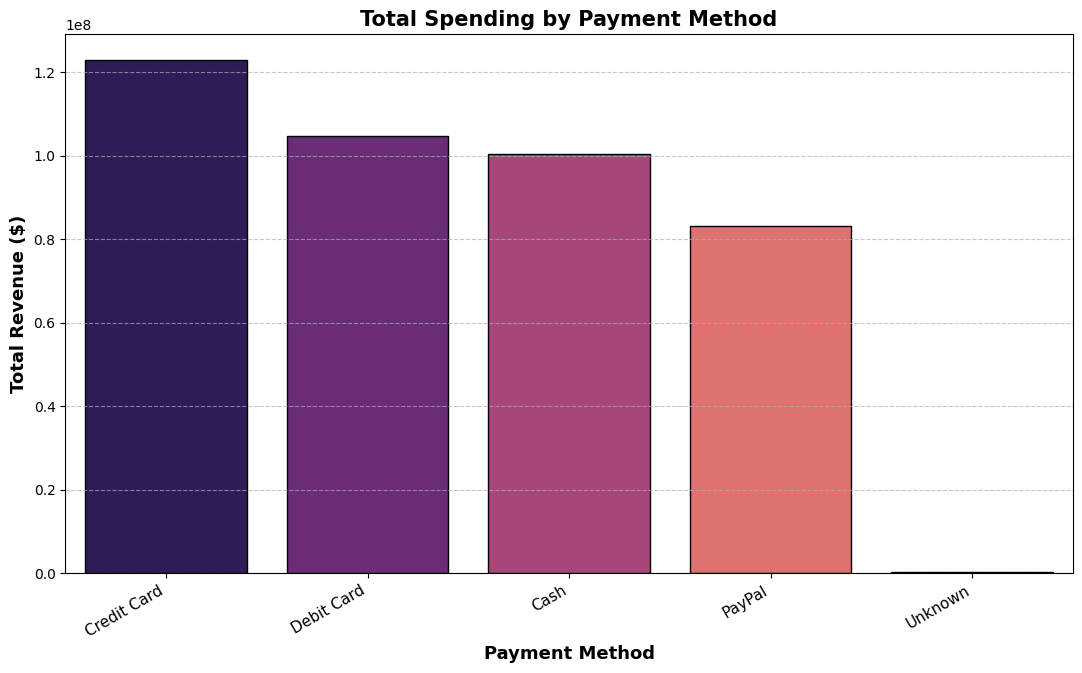

In [43]:
# Total Spending by Payment Method
payment_spending = retail_data.groupby("Payment_Method")["Total_Amount"].sum().sort_values(ascending=False)


plt.figure(figsize=(13, 7))
sns.barplot(x=payment_spending.index, y=payment_spending.values, palette="magma", edgecolor="black")


plt.xticks(rotation=30, ha="right", fontsize=11)
plt.xlabel("Payment Method", fontsize=13, fontweight="bold")
plt.ylabel("Total Revenue ($)", fontsize=13, fontweight="bold")
plt.title("Total Spending by Payment Method", fontsize=15, fontweight="bold")

# Removing extra grid lines for a cleaner look because the previous one was a mess
plt.grid(axis="y", linestyle="--", alpha=0.7) 


plt.show()

In [44]:
payment_spending_values = retail_data.groupby("Payment_Method")["Total_Amount"].sum().reset_index()


payment_spending_values

,Payment_Method,Total_Amount
0,Cash,1.005485e+08
1,Credit Card,1.229702e+08
2,Debit Card,1.046860e+08
3,PayPal,8.309592e+07
4,Unknown,3.984554e+05


In [45]:
# Getting the average transaction amount if different payment method
payment_avg_spending = retail_data.groupby("Payment_Method")["Total_Amount"].mean().sort_values(ascending=False)


print(payment_avg_spending)

Payment_Method
Credit Card    1367.794247
Debit Card     1366.070050
PayPal         1365.317003
Cash           1364.868275
Unknown        1341.600816
Name: Total_Amount, dtype: float64


In [46]:
# Calculates total spending per country and ranks them to identify the top 10 highest-spending regions in retail, but we have only 6 region names
geo_spending = retail_data.groupby("Country")["Total_Amount"].sum().sort_values(ascending=False).reset_index()

print(geo_spending.head(10))

     Country  Total_Amount
0        USA  1.294143e+08
1         UK  8.648782e+07
2    Germany  7.198255e+07
3  Australia  6.188363e+07
4     Canada  6.158247e+07
5    Unknown  3.482893e+05


/var/folders/ph/rp_k0z0x7rzbmjtd7j2pdjjc0000gn/T/ipykernel_50740/2021950471.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_avg_spending.index, y=country_avg_spending.values, palette="magma", edgecolor="black")


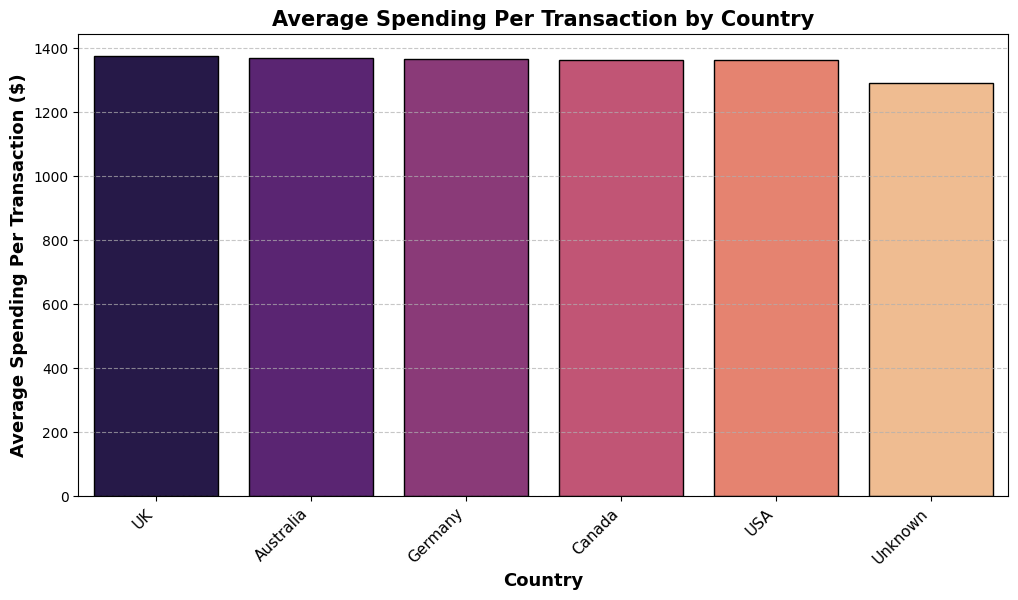

In [47]:
country_avg_spending = retail_data.groupby("Country")["Total_Amount"].mean().sort_values(ascending=False)

# Creating a bar plot for average spending per country
plt.figure(figsize=(12, 6))
sns.barplot(x=country_avg_spending.index, y=country_avg_spending.values, palette="magma", edgecolor="black")

# Adding labels and title
plt.xticks(rotation=45, ha="right", fontsize=11)
plt.xlabel("Country", fontsize=13, fontweight="bold")
plt.ylabel("Average Spending Per Transaction ($)", fontsize=13, fontweight="bold")
plt.title("Average Spending Per Transaction by Country", fontsize=15, fontweight="bold")
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Light dashed grid only on Y-axis


plt.show()

In [56]:
geo_spending = retail_data.groupby("Country")["Total_Amount"].sum().sort_values(ascending=False).reset_index()

# Displaying the top 10 countries by spending
print(geo_spending.head(10))

     Country  Total_Amount
0        USA  1.294143e+08
1         UK  8.648782e+07
2    Germany  7.198255e+07
3  Australia  6.188363e+07
4     Canada  6.158247e+07
5    Unknown  3.482893e+05


In [58]:
!pip3 install prettytable

  Obtaining dependency information for prettytable from https://files.pythonhosted.org/packages/8c/37/f687efd8760c183787ff16a61ec9e3515355178271f33fd7c14bf42e338c/prettytable-3.15.1-py3-none-any.whl.metadata

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip


In [63]:
top_countries = [
    (1, "USA", "129,414,300"),
    (2, "UK", "86,487,820"),
    (3, "Germany", "71,982,550"),
    (4, "Australia", "61,883,630"),
    (5, "Canada", "61,582,470"),
    (6, "Unknown", "348,289")
]

# Generate Markdown table format
markdown_table = "| Rank | Country   | Total Amount ($) |\n"
markdown_table += "|------|----------|-----------------:|\n"
for row in top_countries:
    markdown_table += f"|  {row[0]}   | {row[1]}   | {row[2]}   |\n"

print(markdown_table)

| Rank | Country   | Total Amount ($) |
|------|----------|-----------------:|
|  1   | USA   | 129,414,300   |
|  2   | UK   | 86,487,820   |
|  3   | Germany   | 71,982,550   |
|  4   | Australia   | 61,883,630   |
|  5   | Canada   | 61,582,470   |
|  6   | Unknown   | 348,289   |



/var/folders/ph/rp_k0z0x7rzbmjtd7j2pdjjc0000gn/T/ipykernel_50740/3569816596.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loyalty_spending.index, y=loyalty_spending.values, palette="coolwarm", edgecolor="black")


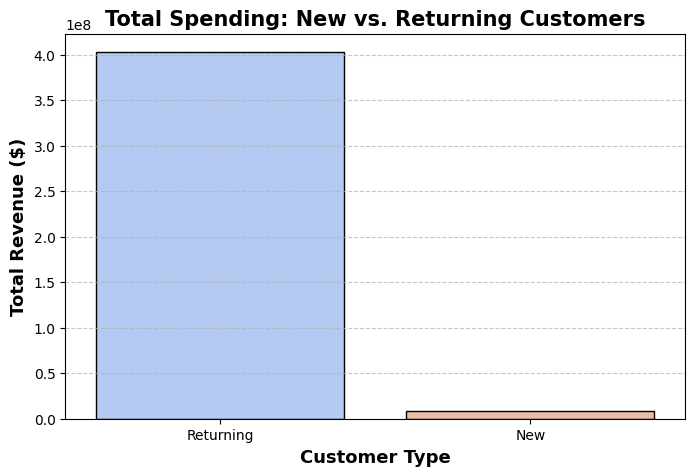

In [48]:
retail_data["Customer_Type"] = retail_data["Total_Purchases"].apply(lambda x: "Returning" if x > 1 else "New")

# Aggregating total spending by customer type
loyalty_spending = retail_data.groupby("Customer_Type")["Total_Amount"].sum().sort_values(ascending=False)


plt.figure(figsize=(8, 5))
sns.barplot(x=loyalty_spending.index, y=loyalty_spending.values, palette="coolwarm", edgecolor="black")


plt.xlabel("Customer Type", fontsize=13, fontweight="bold")
plt.ylabel("Total Revenue ($)", fontsize=13, fontweight="bold")
plt.title("Total Spending: New vs. Returning Customers", fontsize=15, fontweight="bold")
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Light dashed grid only on Y-axis


plt.show()

In [49]:
# Customer type and their total spending amount
loyalty_spending_values = retail_data.groupby("Customer_Type")["Total_Amount"].sum().reset_index()


loyalty_spending_values

,Customer_Type,Total_Amount
0,New,8.643154e+06
1,Returning,4.030559e+08


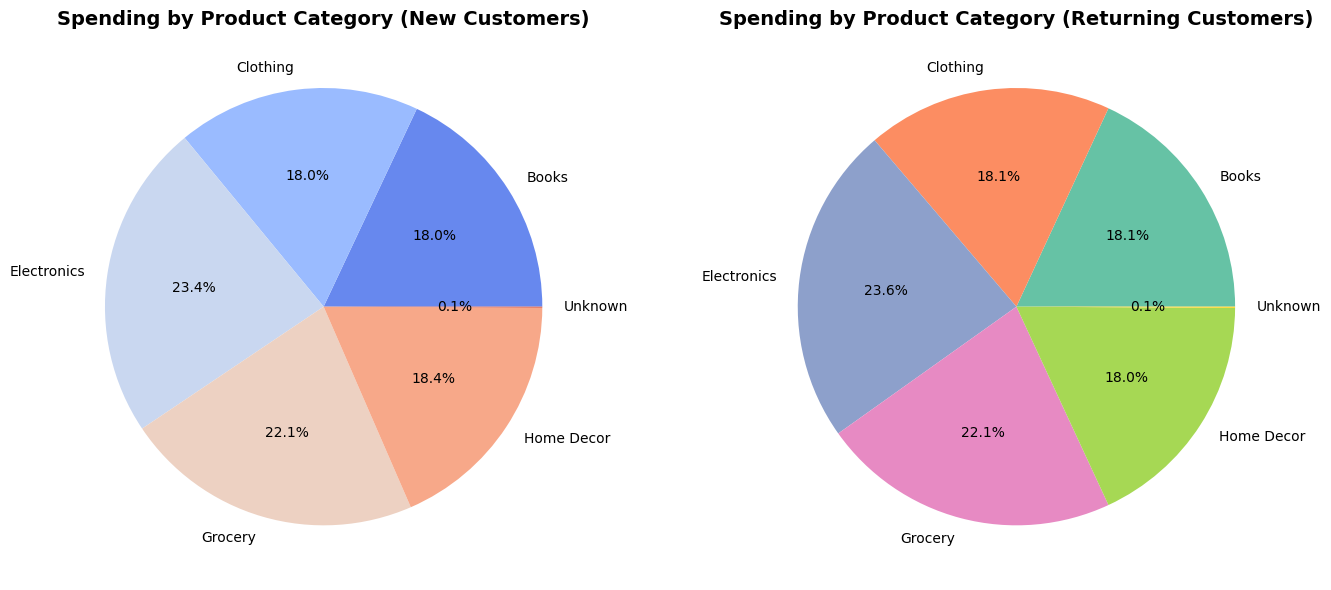

In [50]:
import matplotlib.pyplot as plt

# Filtering data for new and returning customers
new_customer_spending = retail_data[retail_data["Customer_Type"] == "New"].groupby("Product_Category")["Total_Amount"].sum()
returning_customer_spending = retail_data[retail_data["Customer_Type"] == "Returning"].groupby("Product_Category")["Total_Amount"].sum()

# Creating side-by-side pie charts
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pie Chart for New Customers 
axes[0].pie(new_customer_spending, labels=new_customer_spending.index, autopct="%1.1f%%",
            colors=sns.color_palette("coolwarm", len(new_customer_spending)))
axes[0].set_title("Spending by Product Category (New Customers)", fontsize=14, fontweight="bold")

# Pie Chart for Returning Customers 
axes[1].pie(returning_customer_spending, labels=returning_customer_spending.index, autopct="%1.1f%%",
            colors=sns.color_palette("Set2", len(returning_customer_spending)))  # "Set2" has distinct colors
axes[1].set_title("Spending by Product Category (Returning Customers)", fontsize=14, fontweight="bold")


plt.tight_layout()
plt.show()

In [51]:
# Getting 2 tables of product category in respect with new and returning customers
new_customer_spending_values = retail_data[retail_data["Customer_Type"] == "New"].groupby("Product_Category")["Total_Amount"].sum().reset_index()
returning_customer_spending_values = retail_data[retail_data["Customer_Type"] == "Returning"].groupby("Product_Category")["Total_Amount"].sum().reset_index()


new_customer_spending_values, returning_customer_spending_values


(  Product_Category  Total_Amount
 0            Books  1.555406e+06
 1         Clothing  1.553035e+06
 2      Electronics  2.026816e+06
 3          Grocery  1.911222e+06
 4       Home Decor  1.589298e+06
 5          Unknown  7.377775e+03,
   Product_Category  Total_Amount
 0            Books  7.290140e+07
 1         Clothing  7.313522e+07
 2      Electronics  9.516519e+07
 3          Grocery  8.896576e+07
 4       Home Decor  7.251529e+07
 5          Unknown  3.730672e+05)

<Figure size 1400x600 with 0 Axes>

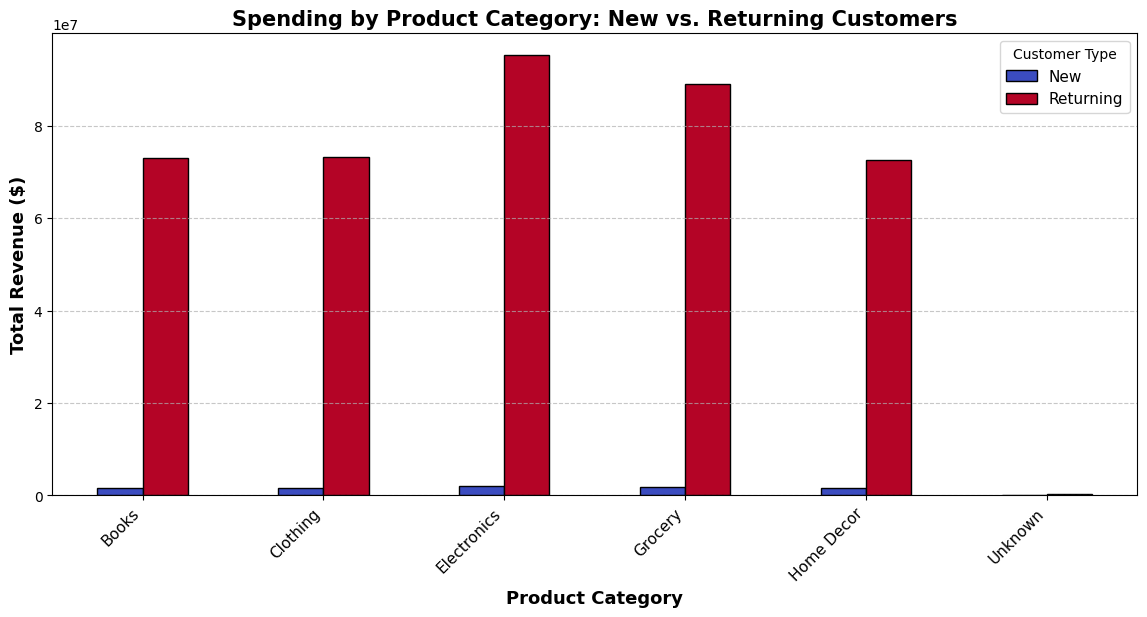

In [52]:
# plot for customers in respect with total revenue
product_category_spending = retail_data.groupby(["Customer_Type", "Product_Category"])["Total_Amount"].sum().unstack()


plt.figure(figsize=(14, 6))
product_category_spending.T.plot(kind="bar", figsize=(14, 6), colormap="coolwarm", edgecolor="black")


plt.xlabel("Product Category", fontsize=13, fontweight="bold")
plt.ylabel("Total Revenue ($)", fontsize=13, fontweight="bold")
plt.title("Spending by Product Category: New vs. Returning Customers", fontsize=15, fontweight="bold")
plt.xticks(rotation=45, ha="right", fontsize=11)
plt.legend(title="Customer Type", fontsize=11)
plt.grid(axis="y", linestyle="--", alpha=0.7)  


plt.show()

In [53]:
product_category_spending_values = retail_data.groupby(["Customer_Type", "Product_Category"])["Total_Amount"].sum().reset_index()


print(product_category_spending_values)

   Customer_Type Product_Category  Total_Amount
0            New            Books  1.555406e+06
1            New         Clothing  1.553035e+06
2            New      Electronics  2.026816e+06
3            New          Grocery  1.911222e+06
4            New       Home Decor  1.589298e+06
5            New          Unknown  7.377775e+03
6      Returning            Books  7.290140e+07
7      Returning         Clothing  7.313522e+07
8      Returning      Electronics  9.516519e+07
9      Returning          Grocery  8.896576e+07
10     Returning       Home Decor  7.251529e+07
11     Returning          Unknown  3.730672e+05
